In [9]:
# Dependencies
import json
import requests
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import datetime
from scipy.stats import linregress


# Import the API key
from config import weather_key

# Abililty to utilize citipy to determine nearest cities using geo coordinates (longitude and Latitude)
from citipy import citipy


# Capture output
cities_output_data = 'output/cities_output.csv'


# Define the range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate the list of Cities

In [10]:
# Create lists to hold the geo coordinates and the cities
lat_lngs = []
cities = []


# Create random latitude and longitude sets
lats = np.random.uniform(low=-90.000, high=90.000, size = 1500)
lngs = np.random.uniform(low=-180.00, high=180.000, size = 1500)
lat_lngs = zip(lats, lngs)

# What are the nearest cities for each latitude and longitude set
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
        
# add the city to the cities list if it is unique
    if city not in cities:
        cities.append(city)
                
# Do I have enough cities?
print(len(cities))

596


Perform API calls to OpenWeatherMap

In [11]:
# Define the url the make the API call
base_url = "http://api.openweathermap.org/data/2.5/weather?"

#Variables to keep track of response number
record = 0
sets = 1

In [12]:
# Create DataFrame
weather_df = pd.DataFrame({"City": cities})

weather_df["Country"] = ""
weather_df["Date"] = ""      
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""
weather_df["Cloudiness (%)"] = ""
weather_df["Humidity (%)"] = ""
weather_df["Max Temp (F)"] = ""
weather_df["Wind Speed (mph)"] = ""


#Run the API call for each city
print('Data Retrieval start')
print("--------------------")

for index, row in weather_df.iterrows():
    
    city = row["City"]
    
    query_url = base_url + "appid=" + weather_key + "&q=" + city
    weather_response = requests.get(query_url).json()
 
    try:
        print(f"Processing Record {record}  of Set {sets} | {city}.")
        #print (query_url) 
        
        weather_df.loc[index, "Country"] = weather_response["sys"]["country"]     
        weather_df.loc[index, "Date"] = datetime.datetime.fromtimestamp(weather_response["dt"])
        weather_df.loc[index, "Latitude"] = weather_response["coord"]["lat"]
        weather_df.loc[index, "Longitude"] = weather_response["coord"]["lon"]
        weather_df.loc[index, "Cloudiness (%)"] = weather_response["clouds"]["all"]
        weather_df.loc[index, "Humidity (%)"] = weather_response["main"]["humidity"]
        weather_df.loc[index, "Max Temp (F)"] = 1.8 * (weather_response["main"]["temp_max"] - 273) + 32
        weather_df.loc[index, "Wind Speed (mph)"] = weather_response["wind"]["speed"]
               
    except:
        print(f"City not found...skipping {city}.")
        #print (query_url) 
         
    record = record + 1
    if record == 50:
        record = 0
        sets = sets + 1 

print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")

Data Retrieval start
--------------------
Processing Record 0  of Set 1 | mar del plata.
City not found...skipping mar del plata.
Processing Record 1  of Set 1 | kapaa.
City not found...skipping kapaa.
Processing Record 2  of Set 1 | tasiilaq.
City not found...skipping tasiilaq.
Processing Record 3  of Set 1 | taltal.
City not found...skipping taltal.
Processing Record 4  of Set 1 | port alfred.
City not found...skipping port alfred.
Processing Record 5  of Set 1 | hermanus.
City not found...skipping hermanus.
Processing Record 6  of Set 1 | ternate.
City not found...skipping ternate.
Processing Record 7  of Set 1 | hovd.
City not found...skipping hovd.
Processing Record 8  of Set 1 | rikitea.
City not found...skipping rikitea.
Processing Record 9  of Set 1 | dingle.
City not found...skipping dingle.
Processing Record 10  of Set 1 | roald.
City not found...skipping roald.
Processing Record 11  of Set 1 | nara.
City not found...skipping nara.
Processing Record 12  of Set 1 | hobart.
Cit

Processing Record 5  of Set 3 | jamestown.
City not found...skipping jamestown.
Processing Record 6  of Set 3 | marcona.
City not found...skipping marcona.
Processing Record 7  of Set 3 | pedernales.
City not found...skipping pedernales.
Processing Record 8  of Set 3 | vallenar.
City not found...skipping vallenar.
Processing Record 9  of Set 3 | grand bank.
City not found...skipping grand bank.
Processing Record 10  of Set 3 | kavieng.
City not found...skipping kavieng.
Processing Record 11  of Set 3 | rio grande.
City not found...skipping rio grande.
Processing Record 12  of Set 3 | ilulissat.
City not found...skipping ilulissat.
Processing Record 13  of Set 3 | grand river south east.
City not found...skipping grand river south east.
Processing Record 14  of Set 3 | souillac.
City not found...skipping souillac.
Processing Record 15  of Set 3 | avarua.
City not found...skipping avarua.
Processing Record 16  of Set 3 | kiama.
City not found...skipping kiama.
Processing Record 17  of Se

Processing Record 10  of Set 5 | haibowan.
City not found...skipping haibowan.
Processing Record 11  of Set 5 | lufilufi.
City not found...skipping lufilufi.
Processing Record 12  of Set 5 | uglovka.
City not found...skipping uglovka.
Processing Record 13  of Set 5 | marawi.
City not found...skipping marawi.
Processing Record 14  of Set 5 | spartanburg.
City not found...skipping spartanburg.
Processing Record 15  of Set 5 | kondinskoye.
City not found...skipping kondinskoye.
Processing Record 16  of Set 5 | klaksvik.
City not found...skipping klaksvik.
Processing Record 17  of Set 5 | kodiak.
City not found...skipping kodiak.
Processing Record 18  of Set 5 | abnub.
City not found...skipping abnub.
Processing Record 19  of Set 5 | sai buri.
City not found...skipping sai buri.
Processing Record 20  of Set 5 | turayf.
City not found...skipping turayf.
Processing Record 21  of Set 5 | gari.
City not found...skipping gari.
Processing Record 22  of Set 5 | georgetown.
City not found...skippi

Processing Record 16  of Set 7 | coos bay.
City not found...skipping coos bay.
Processing Record 17  of Set 7 | la palma.
City not found...skipping la palma.
Processing Record 18  of Set 7 | muriwai beach.
City not found...skipping muriwai beach.
Processing Record 19  of Set 7 | iralaya.
City not found...skipping iralaya.
Processing Record 20  of Set 7 | vaitupu.
City not found...skipping vaitupu.
Processing Record 21  of Set 7 | bhavnagar.
City not found...skipping bhavnagar.
Processing Record 22  of Set 7 | krasnyy chikoy.
City not found...skipping krasnyy chikoy.
Processing Record 23  of Set 7 | luanda.
City not found...skipping luanda.
Processing Record 24  of Set 7 | kropotkin.
City not found...skipping kropotkin.
Processing Record 25  of Set 7 | benghazi.
City not found...skipping benghazi.
Processing Record 26  of Set 7 | basco.
City not found...skipping basco.
Processing Record 27  of Set 7 | aitape.
City not found...skipping aitape.
Processing Record 28  of Set 7 | kadarkut.
C

Processing Record 23  of Set 9 | ulladulla.
City not found...skipping ulladulla.
Processing Record 24  of Set 9 | porto de moz.
City not found...skipping porto de moz.
Processing Record 25  of Set 9 | itarema.
City not found...skipping itarema.
Processing Record 26  of Set 9 | djambala.
City not found...skipping djambala.
Processing Record 27  of Set 9 | mildura.
City not found...skipping mildura.
Processing Record 28  of Set 9 | kampong thum.
City not found...skipping kampong thum.
Processing Record 29  of Set 9 | taoudenni.
City not found...skipping taoudenni.
Processing Record 30  of Set 9 | sovetskiy.
City not found...skipping sovetskiy.
Processing Record 31  of Set 9 | sinnamary.
City not found...skipping sinnamary.
Processing Record 32  of Set 9 | chenove.
City not found...skipping chenove.
Processing Record 33  of Set 9 | andenes.
City not found...skipping andenes.
Processing Record 34  of Set 9 | waingapu.
City not found...skipping waingapu.
Processing Record 35  of Set 9 | sal

Processing Record 29  of Set 11 | nueve de julio.
City not found...skipping nueve de julio.
Processing Record 30  of Set 11 | yinchuan.
City not found...skipping yinchuan.
Processing Record 31  of Set 11 | tonota.
City not found...skipping tonota.
Processing Record 32  of Set 11 | ucluelet.
City not found...skipping ucluelet.
Processing Record 33  of Set 11 | lakatoro.
City not found...skipping lakatoro.
Processing Record 34  of Set 11 | bonthe.
City not found...skipping bonthe.
Processing Record 35  of Set 11 | qaqortoq.
City not found...skipping qaqortoq.
Processing Record 36  of Set 11 | lavrentiya.
City not found...skipping lavrentiya.
Processing Record 37  of Set 11 | varnavino.
City not found...skipping varnavino.
Processing Record 38  of Set 11 | mitsamiouli.
City not found...skipping mitsamiouli.
Processing Record 39  of Set 11 | dudinka.
City not found...skipping dudinka.
Processing Record 40  of Set 11 | sobolevo.
City not found...skipping sobolevo.
Processing Record 41  of S

In [13]:
# Data Count
weather_df.count()

City                596
Country             596
Date                596
Latitude            596
Longitude           596
Cloudiness (%)      596
Humidity (%)        596
Max Temp (F)        596
Wind Speed (mph)    596
dtype: int64

In [14]:
# Display DataFrame
weather_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,mar del plata,,,,,,,,
1,kapaa,,,,,,,,
2,tasiilaq,,,,,,,,
3,taltal,,,,,,,,
4,port alfred,,,,,,,,


In [15]:
# Convert data strings to float
pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float)
pd.to_numeric(weather_df["Humidity (%)"]).astype(float)
pd.to_numeric(weather_df["Latitude"]).astype(float)
pd.to_numeric(weather_df["Longitude"]).astype(float)
pd.to_numeric(weather_df["Max Temp (F)"]).astype(float)
pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float)
weather_df

#Export DataFrame to CSV File
weather_df.to_csv("weather_df.csv")

Text(0.5, 1.0, 'City Latitude vs Max Temperature (01/23/2021)')

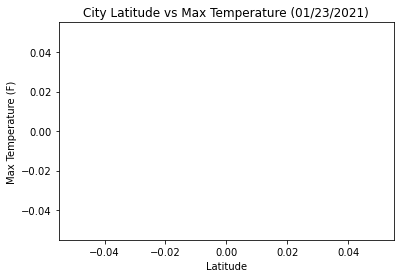

In [8]:

today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Max Temp (F)"]).astype(float), facecolors="skyblue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({today})")
#print("The plot proves that as we generally move away from the equator, temperature drops")